[load_mech_lib_safe] lib_path -> /Users/ewanyao/neuron_pycode/arm64/.libs/libnrnmech.so
[env] python executable: /opt/anaconda3/bin/python
[env] platform.machine: arm64
[probe] mechanism 'axnode' INSERT succeeded -> skip nrn_load_dll.
[CC biphasic] Phase1 Q=-4.980e-08 C, Phase2 Q=5.000e-08 C, net=2.000e-10 C


/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/1115545237.py:356: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/1115545237.py:357: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0


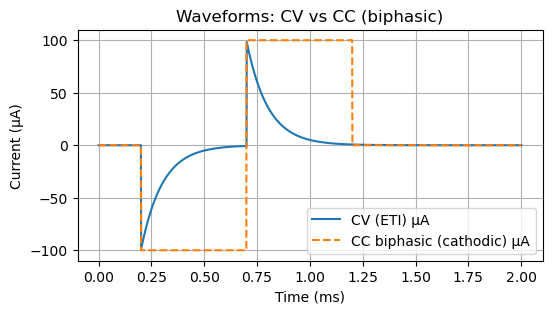


=== sweep alpha = 0.8 ===
 Testing diameter 0.8 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to

/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/1115545237.py:326: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds


-> CV: A_th=0.251953125, Q_th=-0.00126563 nC ; CC: A_th=0.251953125, Q_th=0.0503906 nC
 Testing diameter 6.0 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[b

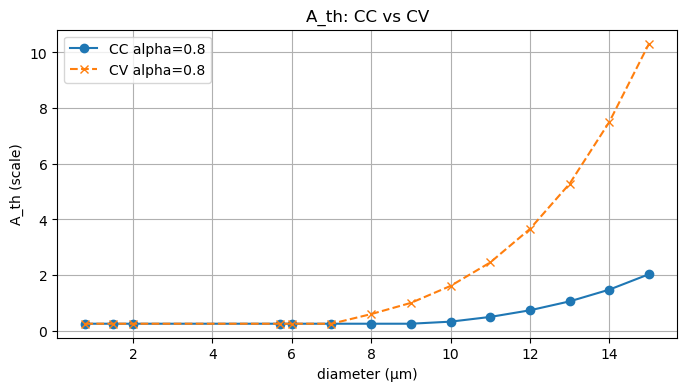

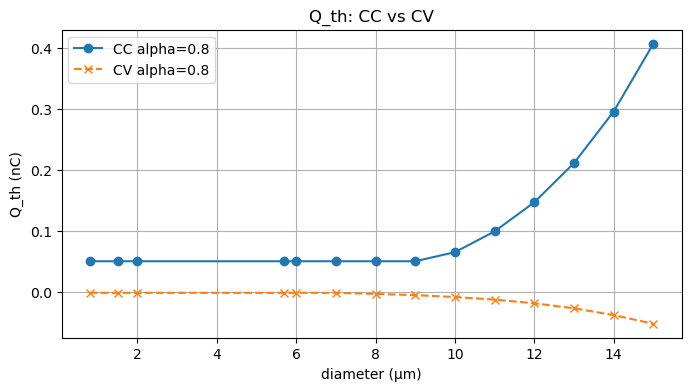


SUMMARY (Q_th in nC):
diam (um) CC_a0.80    CV_a0.80
  0.80 5.0391e-02 -1.2656e-03 
  1.50 5.0391e-02 -1.2656e-03 
  2.00 5.0391e-02 -1.2656e-03 
  5.70 5.0391e-02 -1.2656e-03 
  6.00 5.0391e-02 -1.2656e-03 
  7.00 5.0391e-02 -1.2656e-03 
  8.00 5.0391e-02 -3.0022e-03 
  9.00 5.0391e-02 -5.0233e-03 
 10.00 6.5234e-02 -8.0844e-03 
 11.00 9.9219e-02 -1.2323e-02 
 12.00 1.4687e-01 -1.8366e-02 
 13.00 2.1094e-01 -2.6529e-02 
 14.00 2.9531e-01 -3.7675e-02 
 15.00 4.0625e-01 -5.1803e-02 

Done.


In [ ]:
# run_mrg_etiv_anodic_first.py
"""
Compare CV (ETI-filtered voltage->current) vs biphasic CC (charge-balanced, cathodic-first default)
thresholds on MRG-like axon models with diameter-dependent gnabar scaling.

"""
import os, sys, platform, traceback
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

# ========== USER ADJUSTABLE ==========
# Set to path of your compiled mechanism library, or None to skip loading.
LIB_PATH = "arm64/.libs/libnrnmech.so"   # <-- change to your path or None
HOC_BUILD_FILE = None

# ETI and waveform parameters
V0 = -1e-2               # template electrode voltage (V) used to generate ETI current
t_on = 0.0002
t_off = 0.0007
I_target_A = 100e-6      # desired peak for NEURON (A)
DT_SIM = 0.02            # NEURON dt (ms)
detect_node_idx = 5

# diameters and gnabar scaling values to test
DIAMETERS = [0.8, 1.5, 2.0, 5.7, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
ALPHAS = [0.8]           # list of gnabar alpha values

# ETI / sim time
t_total = 0.002          # s
dt_wave = 1e-6           # s (1 µs)

# biphasic CC params (defaults)
BIP_DUR_CATH = 500e-6
BIP_DUR_ANOD = 500e-6
BIP_IPG = 0.0
PHASE_ORDER = 'cathodic'   # 'anodic' or 'cathodic' first — 改为先阴相（负）后阳相（正）

# ===================================================
h.dt = DT_SIM

# ---------------- Safe mech loader ----------------
def load_mech_lib_safe(lib_path, probe_mech_names=('axnode','AXNODE','mrgNa','node')):
    if lib_path is None:
        print("[load_mech_lib_safe] LIB_PATH is None — skipping mech load.")
        return True
    lib_path = os.path.abspath(lib_path)
    print(f"[load_mech_lib_safe] lib_path -> {lib_path}")
    if not os.path.exists(lib_path):
        raise FileNotFoundError(f"Mechanism library not found at {lib_path}")
    print("[env] python executable:", sys.executable)
    try:
        print("[env] platform.machine:", platform.machine())
    except Exception:
        pass

    # quick probe: if mechanism can already be inserted, assume loaded
    for mech in probe_mech_names:
        try:
            sec = h.Section(name='_probe_')
            try:
                sec.insert(mech)
                print(f"[probe] mechanism '{mech}' INSERT succeeded -> skip nrn_load_dll.")
                try: del sec
                except Exception: pass
                return True
            except Exception:
                try: del sec
                except Exception: pass
        except Exception:
            pass

    # attempt to load library
    try:
        h.nrn_load_dll(lib_path)
        print(f"[load_mech_lib_safe] SUCCESS: loaded mechanisms from {lib_path}")
        return True
    except Exception as e:
        msg = str(e)
        already_patterns = ['user defined name already exists', 'already exists', 'hocobj_call error']
        if any(pat in msg for pat in already_patterns):
            print("[load_mech_lib_safe] Warning: library load reported 'already exists'. Treating as OK.")
            print("  err (truncated):", msg.splitlines()[:4])
            return True
        traceback.print_exc()
        raise

# -------------- ETI / waveform helpers ----------------
def rectangular_pulse(V0, t_on, t_off):
    def Vfunc(t):
        return V0 if (t >= t_on and t <= t_off) else 0.0
    return Vfunc

def biphasic_current_waveform(I_cath_A,
                              dur_cath_s,
                              dur_anod_s=None,
                              ipg_s=0.0,
                              tvec=None,
                              start_time=None,
                              phase_first='cathodic'):
    """
    Generate charge-balanced biphasic current waveform (A).
    - I_cath_A: positive scalar magnitude of cathodic phase (actual cathodic current = -I_cath_A)
    - dur_cath_s: cathodic duration (s)
    - dur_anod_s: anodic duration (s); if None -> equal to dur_cath_s
    - ipg_s: inter-phase gap (s)
    - tvec: time vector (s) (required)
    - start_time: time to start first phase (if None uses global t_on)
    - phase_first: 'cathodic' or 'anodic' (first phase that occurs in time)
    Returns: I_array (A), (phase1_start, phase1_end, phase2_start, phase2_end)
    """
    if tvec is None:
        raise ValueError("tvec must be provided")
    if dur_anod_s is None:
        dur_anod_s = dur_cath_s
    if start_time is None:
        start_time = t_on

    # anodic amplitude computed so that I_anod * dur_anod = I_cath * dur_cath (magnitudes)
    I_anod_amp = abs(I_cath_A) * (dur_cath_s / dur_anod_s)

    I = np.zeros_like(tvec)

    if phase_first.lower().startswith('c'):
        # cathodic first (negative then positive)
        t1_start = start_time
        t1_end = t1_start + dur_cath_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_anod_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = -abs(I_cath_A)
        I[(tvec >= t2_start) & (tvec < t2_end)] = +abs(I_anod_amp)
    else:
        # anodic first
        t1_start = start_time
        t1_end = t1_start + dur_anod_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_cath_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = +abs(I_anod_amp)
        I[(tvec >= t2_start) & (tvec < t2_end)] = -abs(I_cath_A)

    return I, (t1_start, t1_end, t2_start, t2_end)

def generate_eti_current(V_app_func, tvec, R_s=100.0, R_ct=1e6, C_dl=1e-6):
    """
    Simple Randles-like implicit Euler step converting V_app(t) -> I(t)
    V_app_func: callable t->V
    tvec: seconds
    """
    dt = float(tvec[1] - tvec[0])
    N = len(tvec)
    Vp = np.zeros(N); I = np.zeros(N)
    for n in range(N-1):
        V_app_next = V_app_func(tvec[n+1])
        a = C_dl/dt + 1.0/R_ct + 1.0/R_s
        b = C_dl*Vp[n]/dt + V_app_next/R_s
        Vp_next = b / a
        I_next = (V_app_next - Vp_next)/R_s
        Vp[n+1] = Vp_next; I[n+1] = I_next
    return I

def prepare_waveform_for_neuron(t_s, I_A, I_target_A=I_target_A, hard_clip_A=200e-6):
    """
    Convert to NEURON units (ms, nA), scale if peak exceeds target, and clip.
    Returns: t_ms, I_nA
    """
    t_ms = t_s * 1e3
    I_nA = I_A * 1e9
    peak_nA = np.max(np.abs(I_nA))
    hard_clip_nA = hard_clip_A * 1e9
    target_nA = I_target_A * 1e9
    if peak_nA == 0:
        raise RuntimeError("Waveform peak is zero.")
    if peak_nA > hard_clip_nA:
        raise RuntimeError(f"Waveform peak too large: {peak_nA:.3e} nA (>{hard_clip_nA:.3e} nA).")
    if peak_nA > target_nA:
        scale = target_nA / peak_nA
        I_nA = I_nA * scale
        print(f"[prepare] scaled waveform by {scale:.3e} -> target peak {target_nA:.0f} nA")
    I_nA = np.clip(I_nA, -hard_clip_nA, hard_clip_nA)
    return t_ms, I_nA

# -------------- MRG-like builder with scaled gnabar --------------
COMMON_NODE_MECHS = ['axnode', 'AXNODE', 'axnodeNa', 'node']

def build_mrg_nodes_scaled(diameter_um=5.7,
                           num_nodes=21,
                           node_len_um=2.0,
                           internode_len_um=100.0,
                           gnabar_ref_diam=5.7,
                           gnabar_alpha=0.8,
                           gnabar_base_override=None):
    nodes=[]; internodes=[]
    for i in range(num_nodes):
        s = h.Section(name=f'node_{i}')
        s.L = node_len_um; s.diam = diameter_um; s.nseg = 1
        inserted=[]
        for mech in COMMON_NODE_MECHS:
            try:
                s.insert(mech); inserted.append(mech)
            except Exception:
                pass
        if 'hh' not in inserted:
            try:
                s.insert('hh'); inserted.append('hh')
            except Exception:
                pass
        nodes.append(s)
        if i < num_nodes-1:
            it = h.Section(name=f'int_{i}')
            it.L = internode_len_um; it.diam = diameter_um; it.nseg = 1
            try:
                it.insert('pas')
            except Exception:
                pass
            internodes.append(it)

    for i in range(len(internodes)):
        internodes[i].connect(nodes[i], 1.0)
        nodes[i+1].connect(internodes[i], 1.0)

    # detect mech name & gnabar attr to scale
    sample_seg = nodes[0](0.5)
    node_mech_name = None
    for nm in COMMON_NODE_MECHS:
        if hasattr(sample_seg, nm):
            node_mech_name = nm; break
    if node_mech_name is None and hasattr(sample_seg, 'hh'):
        node_mech_name = 'hh'

    if node_mech_name is not None:
        seg_mech = getattr(sample_seg, node_mech_name)
        possible_names = ['gnabar','gbar','gna','g_na','g_Na','gNa']
        gn_attr = None
        for name in possible_names:
            if hasattr(seg_mech, name):
                gn_attr = name; break
        if gn_attr is None:
            attrs = [a for a in dir(seg_mech) if not a.startswith('_')]
            numeric_attrs = []
            for a in attrs:
                try:
                    v = getattr(seg_mech, a)
                    if isinstance(v, (int, float)):
                        numeric_attrs.append((a, float(v)))
                except Exception:
                    pass
            cand = None
            for a,_ in numeric_attrs:
                if 'g' in a.lower() and ('na' in a.lower() or 'bar' in a.lower()):
                    cand = a; break
            if cand is None and numeric_attrs:
                cand = numeric_attrs[0][0]
            gn_attr = cand
        if gn_attr is not None:
            try:
                cur_val = float(getattr(seg_mech, gn_attr))
            except Exception:
                cur_val = None
            if cur_val is None:
                print("[build_mrg_nodes_scaled] could not read current gnabar value; skipping scaling.")
            else:
                if gnabar_base_override is not None:
                    base = float(gnabar_base_override)
                else:
                    base = cur_val / ((diameter_um / gnabar_ref_diam) ** gnabar_alpha) if gnabar_ref_diam != 0 else cur_val
                new_density = base * ((diameter_um / gnabar_ref_diam) ** gnabar_alpha)
                applied = 0
                for s in nodes:
                    seg = s(0.5)
                    try:
                        mech = getattr(seg, node_mech_name)
                        setattr(mech, gn_attr, new_density)
                        applied += 1
                    except Exception:
                        pass
                print(f"[build_mrg_nodes_scaled] set '{gn_attr}' on node mech '{node_mech_name}' to {new_density:.3e} (alpha={gnabar_alpha}) on {applied} nodes.")
        else:
            print("[build_mrg_nodes_scaled] No gnabar-like attribute detected; skipping scaling.")
    else:
        print("[build_mrg_nodes_scaled] No node mechanism object detected; skipping scaling.")

    diag = {'num_nodes': num_nodes, 'node_L': node_len_um, 'internode_L': internode_len_um}
    return nodes, internodes, diag

# -------------- Simulation helpers --------------
def run_and_detect_AP(nodes, t_ms, I_nA_wave, detect_idx=detect_node_idx):
    stim = h.IClamp(nodes[0](0.5))
    stim.delay = 0.0; stim.dur = 1e9
    vec_t = h.Vector(t_ms.tolist()); vec_i = h.Vector(I_nA_wave.tolist())
    vec_i.play(stim._ref_amp, vec_t)
    rec_t = h.Vector(); rec_v = h.Vector()
    rec_t.record(h._ref_t)
    rec_v.record(nodes[min(detect_idx, len(nodes)-1)](0.5)._ref_v)
    h.finitialize(-65.0); h.continuerun(t_ms[-1] + 5.0)
    v = np.array(rec_v); time = np.array(rec_t)
    vm_max = v.max() if len(v)>0 else -999
    dvdt = np.max(np.diff(v)/np.diff(time)) if len(time)>1 else 0.0
    ap = (vm_max > 0.0) or (dvdt > 15.0)
    return ap, time, v

def threshold_search(nodes_factory, t_ms, I_nA_unit, low=0.0, max_factor=200.0, tol=1e-2):
    A = max(0.5, 1e-6 if low==0 else low)
    found=False
    while A <= max_factor:
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * A)
        if ap:
            found=True; hi=A; lo=A/2.0; break
        A *= 2.0
    if not found:
        return None, None
    for _ in range(25):
        mid = 0.5*(lo+hi)
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * mid)
        if ap:
            hi = mid
        else:
            lo = mid
        if hi>0 and (hi-lo)/hi < tol:
            break
    A_th = hi
    I_A_unit = I_nA_unit * 1e-9
    try:
        Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds
    except Exception:
        Q_th = np.trapz(I_A_unit * A_th, np.array(t_ms)*1e-3)
    return A_th, Q_th

# ---------------- Main ----------------
def main():
    try:
        load_mech_lib_safe(LIB_PATH)
    except Exception as e:
        print("Load failed:", e); return

    global t
    t = np.arange(0, t_total + dt_wave, dt_wave)  # seconds

    # CV waveform via ETI
    Vfunc = rectangular_pulse(V0, t_on, t_off)
    I_raw_cv = generate_eti_current(Vfunc, t, R_s=100.0, R_ct=1e6, C_dl=1e-6)
    t_ms, I_nA_cv = prepare_waveform_for_neuron(t, I_raw_cv, I_target_A=I_target_A)

    # CC biphasic (cathodic-first according to PHASE_ORDER)
    I_raw_cc, ph_times = biphasic_current_waveform(I_target_A, BIP_DUR_CATH,
                                                   dur_anod_s=BIP_DUR_ANOD,
                                                   ipg_s=BIP_IPG,
                                                   tvec=t,
                                                   start_time=t_on,
                                                   phase_first=PHASE_ORDER)
    # diagnostic charge check
    mask_p1 = (t >= ph_times[0]) & (t < ph_times[1])
    mask_p2 = (t >= ph_times[2]) & (t < ph_times[3])
    Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
    Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0
    print(f"[CC biphasic] Phase1 Q={Q_p1:.3e} C, Phase2 Q={Q_p2:.3e} C, net={Q_p1+Q_p2:.3e} C")

    t_ms_cc, I_nA_cc = prepare_waveform_for_neuron(t, I_raw_cc, I_target_A=I_target_A)

    # plot waveforms
    plt.figure(figsize=(6,3))
    plt.plot(t_ms, I_nA_cv*1e-3, label='CV (ETI) µA')
    plt.plot(t_ms_cc, I_nA_cc*1e-3, ls='--', label=f'CC biphasic ({PHASE_ORDER}) µA')
    plt.xlabel('Time (ms)'); plt.ylabel('Current (µA)'); plt.legend(); plt.title('Waveforms: CV vs CC (biphasic)'); plt.grid(True); plt.show()

    # sweep diameters & alphas
    results = {}
    for alpha in ALPHAS:
        print(f"\n=== sweep alpha = {alpha} ===")
        results[alpha] = {}
        for d in DIAMETERS:
            print(f" Testing diameter {d} µm ...", end=' ')
            def nodes_factory_local(dlocal=d, alpha_local=alpha):
                nodes, ints, diag = build_mrg_nodes_scaled(dlocal, num_nodes=21, node_len_um=2.0,
                                                           internode_len_um=max(50, 100*dlocal),
                                                           gnabar_ref_diam=5.7,
                                                           gnabar_alpha=alpha_local,
                                                           gnabar_base_override=None)
                return nodes, ints, diag

            try:
                A_th_cv, Q_th_cv = threshold_search(nodes_factory_local, t_ms, I_nA_cv, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CV:", e); A_th_cv, Q_th_cv = None, None

            try:
                A_th_cc, Q_th_cc = threshold_search(nodes_factory_local, t_ms_cc, I_nA_cc, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CC:", e); A_th_cc, Q_th_cc = None, None

            print(f"-> CV: A_th={A_th_cv}, Q_th={(Q_th_cv*1e9) if Q_th_cv is not None else None:.6g} nC ; CC: A_th={A_th_cc}, Q_th={(Q_th_cc*1e9) if Q_th_cc is not None else None:.6g} nC")
            results[alpha][d] = {'A_th_cv': A_th_cv, 'Q_th_cv': Q_th_cv, 'A_th_cc': A_th_cc, 'Q_th_cc': Q_th_cc}

    # plot comparisons
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Avals_cv = [results[alpha][d]['A_th_cv'] if results[alpha][d]['A_th_cv'] is not None else np.nan for d in DIAMETERS]
        Avals_cc = [results[alpha][d]['A_th_cc'] if results[alpha][d]['A_th_cc'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Avals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Avals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('A_th (scale)'); plt.title('A_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Qvals_cc = [ (results[alpha][d]['Q_th_cc']*1e9) if results[alpha][d]['Q_th_cc'] is not None else np.nan for d in DIAMETERS]
        Qvals_cv = [ (results[alpha][d]['Q_th_cv']*1e9) if results[alpha][d]['Q_th_cv'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Qvals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Qvals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('Q_th (nC)'); plt.title('Q_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # print summary
    print("\nSUMMARY (Q_th in nC):")
    header = "diam (um) " + " ".join([f"CC_a{a:0.2f}    CV_a{a:0.2f}" for a in ALPHAS])
    print(header)
    for d in DIAMETERS:
        row = f"{d:6.2f} "
        for a in ALPHAS:
            qc = results[a][d]['Q_th_cc']; qv = results[a][d]['Q_th_cv']
            row += f"{(qc*1e9):10.4e} " if qc is not None else "   None    "
            row += f"{(qv*1e9):10.4e} " if qv is not None else "   None    "
        print(row)

    print("\nDone.")

if __name__ == "__main__":
    main()


[load_mech_lib_safe] lib_path -> /Users/ewanyao/neuron_pycode/arm64/.libs/libnrnmech.so
[env] python executable: /opt/anaconda3/bin/python
[env] platform.machine: arm64
[probe] mechanism 'axnode' INSERT succeeded -> skip nrn_load_dll.
[CC biphasic] Phase1 Q=4.980e-08 C, Phase2 Q=-5.000e-08 C, net=-2.000e-10 C


/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2753296027.py:356: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2753296027.py:357: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0


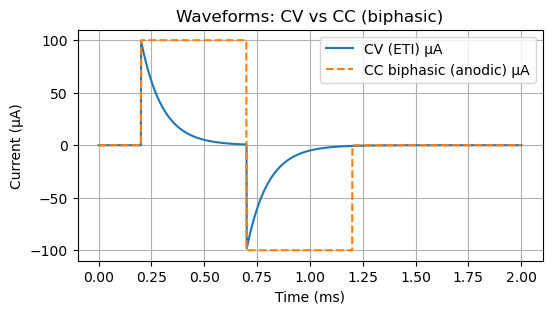


=== sweep alpha = 0.8 ===
 Testing diameter 0.8 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to

/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2753296027.py:326: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds


-> CV: A_th=0.251953125, Ith=24.946 µA, Q_th=0.00126563 nC ; CC: A_th=0.251953125, Ith=25.195 µA, Q_th=-0.0503906 nC
 Testing diameter 7.0 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+

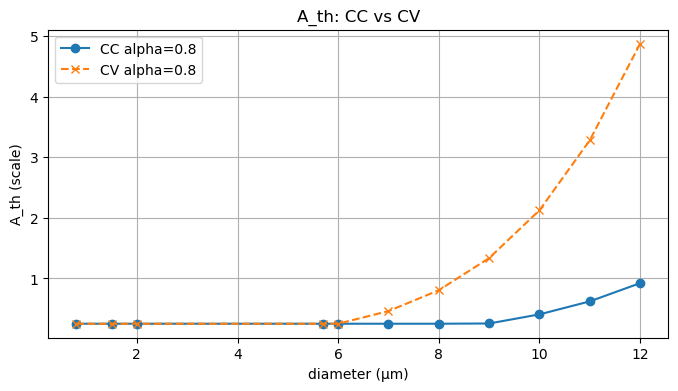

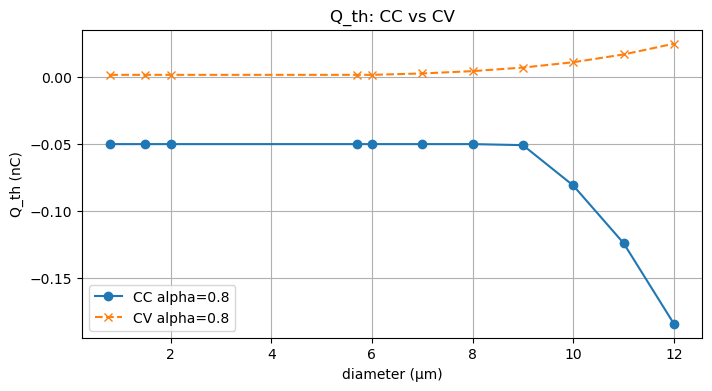

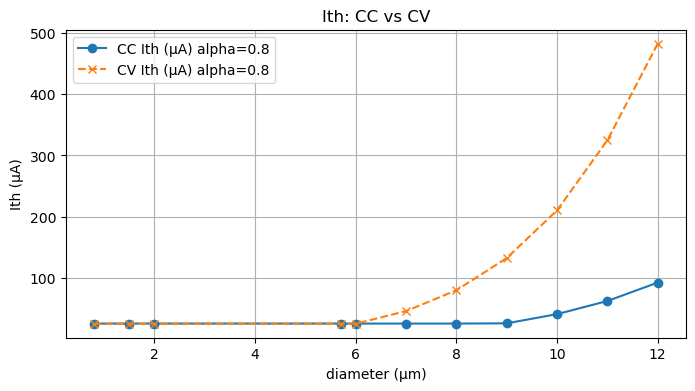


SUMMARY (Q_th in nC, Ith in µA):
diam (um) CC_a0.80_Ith(µA) CV_a0.80_Ith(µA) CC_a0.80_Q(nC) CV_a0.80_Q(nC)
  0.80 2.5195e+01 2.4946e+01  -5.0391e-02   1.2656e-03 
  1.50 2.5195e+01 2.4946e+01  -5.0391e-02   1.2656e-03 
  2.00 2.5195e+01 2.4946e+01  -5.0391e-02   1.2656e-03 
  5.70 2.5195e+01 2.4946e+01  -5.0391e-02   1.2656e-03 
  6.00 2.5195e+01 2.4946e+01  -5.0391e-02   1.2656e-03 
  7.00 2.5195e+01 4.5637e+01  -5.0391e-02   2.3154e-03 
  8.00 2.5195e+01 7.9672e+01  -5.0391e-02   4.0422e-03 
  9.00 2.5586e+01 1.3227e+02  -5.1172e-02   6.7108e-03 
 10.00 4.0625e+01 2.1040e+02  -8.1250e-02   1.0674e-02 
 11.00 6.2109e+01 3.2488e+02  -1.2422e-01   1.6483e-02 
 12.00 9.2188e+01 4.8267e+02  -1.8437e-01   2.4489e-02 

Done.


In [30]:
# run_mrg_etiv_anodic_first.py
"""
Compare CV (ETI-filtered voltage->current) vs biphasic CC (charge-balanced, anodic-first default)
thresholds on MRG-like axon models with diameter-dependent gnabar scaling.

Added: compute Ith = A_th * I_peak (I_peak = peak of the unit waveform) for each threshold.
"""
import os, sys, platform, traceback
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

# ========== USER ADJUSTABLE ==========
# Set to path of your compiled mechanism library, or None to skip loading.
LIB_PATH = "arm64/.libs/libnrnmech.so"   # <-- change to your path or None
HOC_BUILD_FILE = None

# ETI and waveform parameters
V0 = 1e-2                # template electrode voltage (V) used to generate ETI current
t_on = 0.0002
t_off = 0.0007
I_target_A = 100e-6      # desired peak for NEURON (A)
DT_SIM = 0.02            # NEURON dt (ms)
detect_node_idx = 5

# diameters and gnabar scaling values to test
DIAMETERS = [0.8, 1.5, 2.0, 5.7, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
ALPHAS = [0.8]           # list of gnabar alpha values

# ETI / sim time
t_total = 0.002          # s
dt_wave = 1e-6           # s (1 µs)

# biphasic CC params (defaults)
BIP_DUR_CATH = 500e-6
BIP_DUR_ANOD = 500e-6
BIP_IPG = 0.0
PHASE_ORDER = 'anodic'   # 'anodic' or 'cathodic' first

# ===================================================
h.dt = DT_SIM

# ---------------- Safe mech loader ----------------
def load_mech_lib_safe(lib_path, probe_mech_names=('axnode','AXNODE','mrgNa','node')):
    if lib_path is None:
        print("[load_mech_lib_safe] LIB_PATH is None — skipping mech load.")
        return True
    lib_path = os.path.abspath(lib_path)
    print(f"[load_mech_lib_safe] lib_path -> {lib_path}")
    if not os.path.exists(lib_path):
        raise FileNotFoundError(f"Mechanism library not found at {lib_path}")
    print("[env] python executable:", sys.executable)
    try:
        print("[env] platform.machine:", platform.machine())
    except Exception:
        pass

    # quick probe: if mechanism can already be inserted, assume loaded
    for mech in probe_mech_names:
        try:
            sec = h.Section(name='_probe_')
            try:
                sec.insert(mech)
                print(f"[probe] mechanism '{mech}' INSERT succeeded -> skip nrn_load_dll.")
                try: del sec
                except Exception: pass
                return True
            except Exception:
                try: del sec
                except Exception: pass
        except Exception:
            pass

    # attempt to load library
    try:
        h.nrn_load_dll(lib_path)
        print(f"[load_mech_lib_safe] SUCCESS: loaded mechanisms from {lib_path}")
        return True
    except Exception as e:
        msg = str(e)
        already_patterns = ['user defined name already exists', 'already exists', 'hocobj_call error']
        if any(pat in msg for pat in already_patterns):
            print("[load_mech_lib_safe] Warning: library load reported 'already exists'. Treating as OK.")
            print("  err (truncated):", msg.splitlines()[:4])
            return True
        traceback.print_exc()
        raise

# -------------- ETI / waveform helpers ----------------
def rectangular_pulse(V0, t_on, t_off):
    def Vfunc(t):
        return V0 if (t >= t_on and t <= t_off) else 0.0
    return Vfunc

def biphasic_current_waveform(I_cath_A,
                              dur_cath_s,
                              dur_anod_s=None,
                              ipg_s=0.0,
                              tvec=None,
                              start_time=None,
                              phase_first='anodic'):
    """
    Generate charge-balanced biphasic current waveform (A).
    - I_cath_A: positive scalar magnitude of cathodic phase (actual cathodic current = -I_cath_A)
    - dur_cath_s: cathodic duration (s)
    - dur_anod_s: anodic duration (s); if None -> equal to dur_cath_s
    - ipg_s: inter-phase gap (s)
    - tvec: time vector (s) (required)
    - start_time: time to start first phase (if None uses global t_on)
    - phase_first: 'cathodic' or 'anodic' (first phase that occurs in time)
    Returns: I_array (A), (phase1_start, phase1_end, phase2_start, phase2_end)
    """
    if tvec is None:
        raise ValueError("tvec must be provided")
    if dur_anod_s is None:
        dur_anod_s = dur_cath_s
    if start_time is None:
        start_time = t_on

    # anodic amplitude computed so that I_anod * dur_anod = I_cath * dur_cath (magnitudes)
    I_anod_amp = abs(I_cath_A) * (dur_cath_s / dur_anod_s)

    I = np.zeros_like(tvec)

    if phase_first.lower().startswith('c'):
        # cathodic first (default alternate behavior)
        t1_start = start_time
        t1_end = t1_start + dur_cath_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_anod_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = -abs(I_cath_A)
        I[(tvec >= t2_start) & (tvec < t2_end)] = +abs(I_anod_amp)
    else:
        # anodic first
        t1_start = start_time
        t1_end = t1_start + dur_anod_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_cath_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = +abs(I_anod_amp)
        I[(tvec >= t2_start) & (tvec < t2_end)] = -abs(I_cath_A)

    return I, (t1_start, t1_end, t2_start, t2_end)

def generate_eti_current(V_app_func, tvec, R_s=100.0, R_ct=1e6, C_dl=1e-6):
    """
    Simple Randles-like implicit Euler step converting V_app(t) -> I(t)
    V_app_func: callable t->V
    tvec: seconds
    """
    dt = float(tvec[1] - tvec[0])
    N = len(tvec)
    Vp = np.zeros(N); I = np.zeros(N)
    for n in range(N-1):
        V_app_next = V_app_func(tvec[n+1])
        a = C_dl/dt + 1.0/R_ct + 1.0/R_s
        b = C_dl*Vp[n]/dt + V_app_next/R_s
        Vp_next = b / a
        I_next = (V_app_next - Vp_next)/R_s
        Vp[n+1] = Vp_next; I[n+1] = I_next
    return I

def prepare_waveform_for_neuron(t_s, I_A, I_target_A=I_target_A, hard_clip_A=200e-6):
    """
    Convert to NEURON units (ms, nA), scale if peak exceeds target, and clip.
    Returns: t_ms, I_nA
    """
    t_ms = t_s * 1e3
    I_nA = I_A * 1e9
    peak_nA = np.max(np.abs(I_nA))
    hard_clip_nA = hard_clip_A * 1e9
    target_nA = I_target_A * 1e9
    if peak_nA == 0:
        raise RuntimeError("Waveform peak is zero.")
    if peak_nA > hard_clip_nA:
        raise RuntimeError(f"Waveform peak too large: {peak_nA:.3e} nA (>{hard_clip_nA:.3e} nA).")
    if peak_nA > target_nA:
        scale = target_nA / peak_nA
        I_nA = I_nA * scale
        print(f"[prepare] scaled waveform by {scale:.3e} -> target peak {target_nA:.0f} nA")
    I_nA = np.clip(I_nA, -hard_clip_nA, hard_clip_nA)
    return t_ms, I_nA

# -------------- MRG-like builder with scaled gnabar --------------
COMMON_NODE_MECHS = ['axnode', 'AXNODE', 'axnodeNa', 'node']

def build_mrg_nodes_scaled(diameter_um=5.7,
                           num_nodes=21,
                           node_len_um=2.0,
                           internode_len_um=100.0,
                           gnabar_ref_diam=5.7,
                           gnabar_alpha=0.8,
                           gnabar_base_override=None):
    nodes=[]; internodes=[]
    for i in range(num_nodes):
        s = h.Section(name=f'node_{i}')
        s.L = node_len_um; s.diam = diameter_um; s.nseg = 1
        inserted=[]
        for mech in COMMON_NODE_MECHS:
            try:
                s.insert(mech); inserted.append(mech)
            except Exception:
                pass
        if 'hh' not in inserted:
            try:
                s.insert('hh'); inserted.append('hh')
            except Exception:
                pass
        nodes.append(s)
        if i < num_nodes-1:
            it = h.Section(name=f'int_{i}')
            it.L = internode_len_um; it.diam = diameter_um; it.nseg = 1
            try:
                it.insert('pas')
            except Exception:
                pass
            internodes.append(it)

    for i in range(len(internodes)):
        internodes[i].connect(nodes[i], 1.0)
        nodes[i+1].connect(internodes[i], 1.0)

    # detect mech name & gnabar attr to scale
    sample_seg = nodes[0](0.5)
    node_mech_name = None
    for nm in COMMON_NODE_MECHS:
        if hasattr(sample_seg, nm):
            node_mech_name = nm; break
    if node_mech_name is None and hasattr(sample_seg, 'hh'):
        node_mech_name = 'hh'

    if node_mech_name is not None:
        seg_mech = getattr(sample_seg, node_mech_name)
        possible_names = ['gnabar','gbar','gna','g_na','g_Na','gNa']
        gn_attr = None
        for name in possible_names:
            if hasattr(seg_mech, name):
                gn_attr = name; break
        if gn_attr is None:
            attrs = [a for a in dir(seg_mech) if not a.startswith('_')]
            numeric_attrs = []
            for a in attrs:
                try:
                    v = getattr(seg_mech, a)
                    if isinstance(v, (int, float)):
                        numeric_attrs.append((a, float(v)))
                except Exception:
                    pass
            cand = None
            for a,_ in numeric_attrs:
                if 'g' in a.lower() and ('na' in a.lower() or 'bar' in a.lower()):
                    cand = a; break
            if cand is None and numeric_attrs:
                cand = numeric_attrs[0][0]
            gn_attr = cand
        if gn_attr is not None:
            try:
                cur_val = float(getattr(seg_mech, gn_attr))
            except Exception:
                cur_val = None
            if cur_val is None:
                print("[build_mrg_nodes_scaled] could not read current gnabar value; skipping scaling.")
            else:
                if gnabar_base_override is not None:
                    base = float(gnabar_base_override)
                else:
                    base = cur_val / ((diameter_um / gnabar_ref_diam) ** gnabar_alpha) if gnabar_ref_diam != 0 else cur_val
                new_density = base * ((diameter_um / gnabar_ref_diam) ** gnabar_alpha)
                applied = 0
                for s in nodes:
                    seg = s(0.5)
                    try:
                        mech = getattr(seg, node_mech_name)
                        setattr(mech, gn_attr, new_density)
                        applied += 1
                    except Exception:
                        pass
                print(f"[build_mrg_nodes_scaled] set '{gn_attr}' on node mech '{node_mech_name}' to {new_density:.3e} (alpha={gnabar_alpha}) on {applied} nodes.")
        else:
            print("[build_mrg_nodes_scaled] No gnabar-like attribute detected; skipping scaling.")
    else:
        print("[build_mrg_nodes_scaled] No node mechanism object detected; skipping scaling.")

    diag = {'num_nodes': num_nodes, 'node_L': node_len_um, 'internode_L': internode_len_um}
    return nodes, internodes, diag

# -------------- Simulation helpers --------------
def run_and_detect_AP(nodes, t_ms, I_nA_wave, detect_idx=detect_node_idx):
    stim = h.IClamp(nodes[0](0.5))
    stim.delay = 0.0; stim.dur = 1e9
    vec_t = h.Vector(t_ms.tolist()); vec_i = h.Vector(I_nA_wave.tolist())
    vec_i.play(stim._ref_amp, vec_t)
    rec_t = h.Vector(); rec_v = h.Vector()
    rec_t.record(h._ref_t)
    rec_v.record(nodes[min(detect_idx, len(nodes)-1)](0.5)._ref_v)
    h.finitialize(-65.0); h.continuerun(t_ms[-1] + 5.0)
    v = np.array(rec_v); time = np.array(rec_t)
    vm_max = v.max() if len(v)>0 else -999
    dvdt = np.max(np.diff(v)/np.diff(time)) if len(time)>1 else 0.0
    ap = (vm_max > 0.0) or (dvdt > 15.0)
    return ap, time, v

def threshold_search(nodes_factory, t_ms, I_nA_unit, low=0.0, max_factor=200.0, tol=1e-2):
    A = max(0.5, 1e-6 if low==0 else low)
    found=False
    while A <= max_factor:
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * A)
        if ap:
            found=True; hi=A; lo=A/2.0; break
        A *= 2.0
    if not found:
        return None, None
    for _ in range(25):
        mid = 0.5*(lo+hi)
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * mid)
        if ap:
            hi = mid
        else:
            lo = mid
        if hi>0 and (hi-lo)/hi < tol:
            break
    A_th = hi
    I_A_unit = I_nA_unit * 1e-9
    try:
        Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds
    except Exception:
        Q_th = np.trapz(I_A_unit * A_th, np.array(t_ms)*1e-3)
    return A_th, Q_th

# ---------------- Main ----------------
def main():
    try:
        load_mech_lib_safe(LIB_PATH)
    except Exception as e:
        print("Load failed:", e); return

    global t
    t = np.arange(0, t_total + dt_wave, dt_wave)  # seconds

    # CV waveform via ETI
    Vfunc = rectangular_pulse(V0, t_on, t_off)
    I_raw_cv = generate_eti_current(Vfunc, t, R_s=100.0, R_ct=1e6, C_dl=1e-6)
    t_ms, I_nA_cv = prepare_waveform_for_neuron(t, I_raw_cv, I_target_A=I_target_A)

    # CC biphasic (anodic-first or cathodic-first according to PHASE_ORDER)
    I_raw_cc, ph_times = biphasic_current_waveform(I_target_A, BIP_DUR_CATH,
                                                   dur_anod_s=BIP_DUR_ANOD,
                                                   ipg_s=BIP_IPG,
                                                   tvec=t,
                                                   start_time=t_on,
                                                   phase_first=PHASE_ORDER)
    # diagnostic charge check
    mask_p1 = (t >= ph_times[0]) & (t < ph_times[1])
    mask_p2 = (t >= ph_times[2]) & (t < ph_times[3])
    Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
    Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0
    print(f"[CC biphasic] Phase1 Q={Q_p1:.3e} C, Phase2 Q={Q_p2:.3e} C, net={Q_p1+Q_p2:.3e} C")

    t_ms_cc, I_nA_cc = prepare_waveform_for_neuron(t, I_raw_cc, I_target_A=I_target_A)

    # compute unit waveform peaks (A) to be used when computing Ith = A_th * I_peak
    I_peak_cv_A = float(np.max(np.abs(I_nA_cv))) * 1e-9  # A
    I_peak_cc_A = float(np.max(np.abs(I_nA_cc))) * 1e-9  # A

    # plot waveforms
    plt.figure(figsize=(6,3))
    plt.plot(t_ms, I_nA_cv*1e-3, label='CV (ETI) µA')
    plt.plot(t_ms_cc, I_nA_cc*1e-3, ls='--', label=f'CC biphasic ({PHASE_ORDER}) µA')
    plt.xlabel('Time (ms)'); plt.ylabel('Current (µA)'); plt.legend(); plt.title('Waveforms: CV vs CC (biphasic)'); plt.grid(True); plt.show()

    # sweep diameters & alphas
    results = {}
    for alpha in ALPHAS:
        print(f"\n=== sweep alpha = {alpha} ===")
        results[alpha] = {}
        for d in DIAMETERS:
            print(f" Testing diameter {d} µm ...", end=' ')
            def nodes_factory_local(dlocal=d, alpha_local=alpha):
                nodes, ints, diag = build_mrg_nodes_scaled(dlocal, num_nodes=21, node_len_um=2.0,
                                                           internode_len_um=max(50, 100*dlocal),
                                                           gnabar_ref_diam=5.7,
                                                           gnabar_alpha=alpha_local,
                                                           gnabar_base_override=None)
                return nodes, ints, diag

            try:
                A_th_cv, Q_th_cv = threshold_search(nodes_factory_local, t_ms, I_nA_cv, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CV:", e); A_th_cv, Q_th_cv = None, None

            try:
                A_th_cc, Q_th_cc = threshold_search(nodes_factory_local, t_ms_cc, I_nA_cc, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CC:", e); A_th_cc, Q_th_cc = None, None

            # ------------------ compute Ith = A_th * I_peak ------------------
            if A_th_cv is not None:
                Ith_cv_A = A_th_cv * I_peak_cv_A
                Ith_cv_uA = Ith_cv_A * 1e6
            else:
                Ith_cv_A = None
                Ith_cv_uA = None

            if A_th_cc is not None:
                Ith_cc_A = A_th_cc * I_peak_cc_A
                Ith_cc_uA = Ith_cc_A * 1e6
            else:
                Ith_cc_A = None
                Ith_cc_uA = None
            # -----------------------------------------------------------------

            print(f"-> CV: A_th={A_th_cv}, Ith={Ith_cv_uA:.3f} µA, Q_th={(Q_th_cv*1e9) if Q_th_cv is not None else None:.6g} nC ; "
                  f"CC: A_th={A_th_cc}, Ith={Ith_cc_uA:.3f} µA, Q_th={(Q_th_cc*1e9) if Q_th_cc is not None else None:.6g} nC")

            results[alpha][d] = {
                'A_th_cv': A_th_cv, 'Q_th_cv': Q_th_cv, 'Ith_cv_A': Ith_cv_A, 'Ith_cv_uA': Ith_cv_uA,
                'A_th_cc': A_th_cc, 'Q_th_cc': Q_th_cc, 'Ith_cc_A': Ith_cc_A, 'Ith_cc_uA': Ith_cc_uA
            }

    # plot comparisons (A_th)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Avals_cv = [results[alpha][d]['A_th_cv'] if results[alpha][d]['A_th_cv'] is not None else np.nan for d in DIAMETERS]
        Avals_cc = [results[alpha][d]['A_th_cc'] if results[alpha][d]['A_th_cc'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Avals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Avals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('A_th (scale)'); plt.title('A_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # plot comparisons (Q_th)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Qvals_cc = [ (results[alpha][d]['Q_th_cc']*1e9) if results[alpha][d]['Q_th_cc'] is not None else np.nan for d in DIAMETERS]
        Qvals_cv = [ (results[alpha][d]['Q_th_cv']*1e9) if results[alpha][d]['Q_th_cv'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Qvals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Qvals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('Q_th (nC)'); plt.title('Q_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # plot comparisons (Ith in µA)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Ith_cc = [ results[alpha][d]['Ith_cc_uA'] if results[alpha][d]['Ith_cc_uA'] is not None else np.nan for d in DIAMETERS]
        Ith_cv = [ results[alpha][d]['Ith_cv_uA'] if results[alpha][d]['Ith_cv_uA'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Ith_cc, marker='o', label=f'CC Ith (µA) alpha={alpha}')
        plt.plot(DIAMETERS, Ith_cv, marker='x', ls='--', label=f'CV Ith (µA) alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('Ith (µA)'); plt.title('Ith: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # print summary
    print("\nSUMMARY (Q_th in nC, Ith in µA):")
    header = "diam (um) " + " ".join([f"CC_a{a:0.2f}_Ith(µA) CV_a{a:0.2f}_Ith(µA) CC_a{a:0.2f}_Q(nC) CV_a{a:0.2f}_Q(nC)" for a in ALPHAS])
    print(header)
    for d in DIAMETERS:
        row = f"{d:6.2f} "
        for a in ALPHAS:
            ith_cc = results[a][d]['Ith_cc_uA']; ith_cv = results[a][d]['Ith_cv_uA']
            qc = results[a][d]['Q_th_cc']; qv = results[a][d]['Q_th_cv']
            row += f"{(ith_cc):10.4e} " if ith_cc is not None else "   None    "
            row += f"{(ith_cv):10.4e} " if ith_cv is not None else "   None    "
            row += f"{(qc*1e9):12.4e} " if qc is not None else "     None     "
            row += f"{(qv*1e9):12.4e} " if qv is not None else "     None     "
        print(row)

    print("\nDone.")

if __name__ == "__main__":
    main()


[load_mech_lib_safe] lib_path -> /Users/ewanyao/neuron_pycode/arm64/.libs/libnrnmech.so
[CC biphasic] Phase1 Q=-4.980e-08 C, Phase2 Q=5.000e-08 C, net=2.000e-10 C
[waveform peaks] cathodic peak CV = 99.010 µA ; cathodic peak CC = 100.000 µA


/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2894327009.py:313: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2894327009.py:314: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0


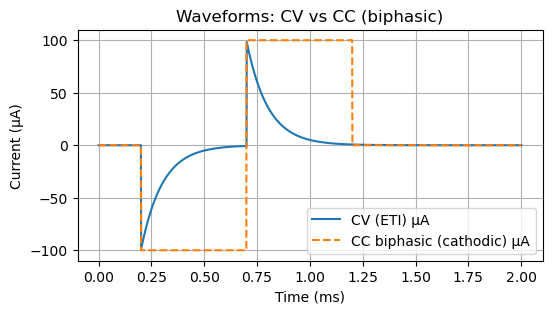


=== sweep alpha = 0.8 ===
 Testing diameter 0.8 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to

/var/folders/8m/tx3t5tyj60b6c60kxmnfjtk40000gn/T/ipykernel_60876/2894327009.py:283: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds


-> CV: A_th=1.0, Ith=99.010 µA, Q_th=-0.00502329 nC ; CC: A_th=0.251953125, Ith=25.195 µA, Q_th=0.0503906 nC
 Testing diameter 10.0 µm ... [build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alpha=0.8) on 21 nodes.
[build_mrg_nodes_scaled] set 'gnabar' on node mech 'axnode' to 3.000e+00 (alp

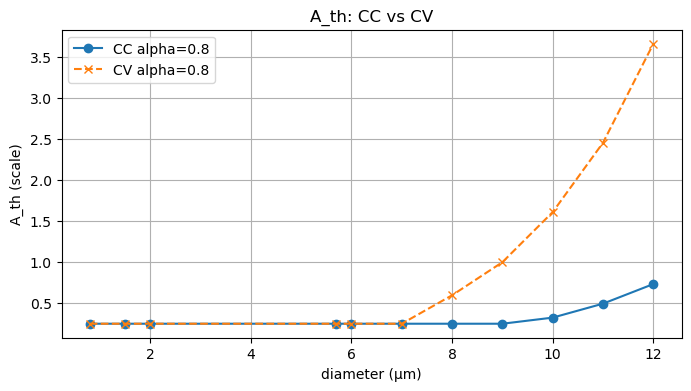

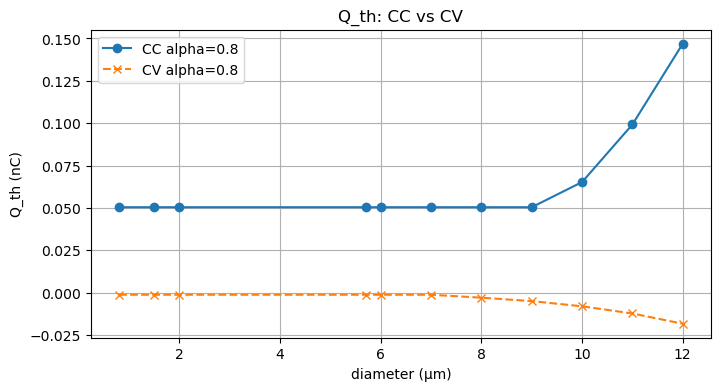

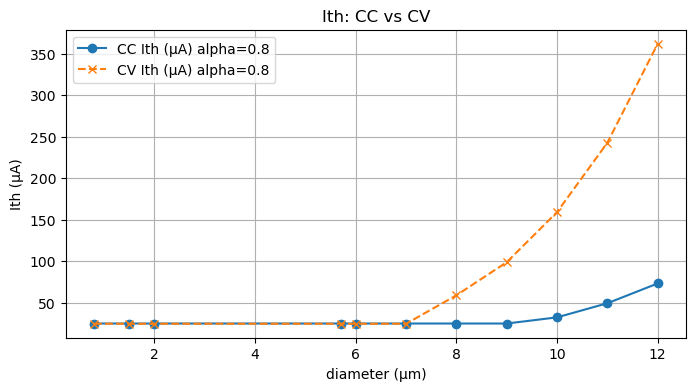


SUMMARY (Q_th in nC, Ith in µA):
diam (um) CC_a0.80_Ith(µA) CV_a0.80_Ith(µA) CC_a0.80_Q(nC) CV_a0.80_Q(nC)
  0.80   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  1.50   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  2.00   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  5.70   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  6.00   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  7.00   2.5195e+01   2.4946e+01   5.0391e-02  -1.2656e-03 
  8.00   2.5195e+01   5.9174e+01   5.0391e-02  -3.0022e-03 
  9.00   2.5195e+01   9.9010e+01   5.0391e-02  -5.0233e-03 
 10.00   3.2617e+01   1.5934e+02   6.5234e-02  -8.0844e-03 
 11.00   4.9609e+01   2.4288e+02   9.9219e-02  -1.2323e-02 
 12.00   7.3438e+01   3.6200e+02   1.4687e-01  -1.8366e-02 

Done.


In [32]:
# run_mrg_etiv_anodic_first.py
"""
Compare CV (ETI-filtered voltage->current) vs biphasic CC (charge-balanced, cathodic-first default)
thresholds on MRG-like axon models with diameter-dependent gnabar scaling.

Modified: compute Ith = A_th * I_cath_peak (use cathodic peak absolute value) and plot Ith.
"""
import os, sys, platform, traceback
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

# ========== USER ADJUSTABLE ==========
LIB_PATH = "arm64/.libs/libnrnmech.so"   # <-- change to your path or None
HOC_BUILD_FILE = None

# ETI and waveform parameters
V0 = -1e-2               # template electrode voltage (V) used to generate ETI current (negative -> cathodic)
t_on = 0.0002
t_off = 0.0007
I_target_A = 100e-6      # desired peak for NEURON (A)
DT_SIM = 0.02            # NEURON dt (ms)
detect_node_idx = 5

# diameters and gnabar scaling values to test
DIAMETERS = [0.8, 1.5, 2.0, 5.7, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
ALPHAS = [0.8]

# ETI / sim time
t_total = 0.002          # s
dt_wave = 1e-6           # s (1 µs)

# biphasic CC params
BIP_DUR_CATH = 500e-6
BIP_DUR_ANOD = 500e-6
BIP_IPG = 0.0
PHASE_ORDER = 'cathodic'   # cathodic-first (negative then positive)

# ===================================================
h.dt = DT_SIM

# ---------------- Safe mech loader ----------------
def load_mech_lib_safe(lib_path, probe_mech_names=('axnode','AXNODE','mrgNa','node')):
    if lib_path is None:
        print("[load_mech_lib_safe] LIB_PATH is None — skipping mech load.")
        return True
    lib_path = os.path.abspath(lib_path)
    print(f"[load_mech_lib_safe] lib_path -> {lib_path}")
    if not os.path.exists(lib_path):
        raise FileNotFoundError(f"Mechanism library not found at {lib_path}")
    for mech in probe_mech_names:
        try:
            sec = h.Section(name='_probe_')
            try:
                sec.insert(mech)
                try: del sec
                except Exception: pass
                return True
            except Exception:
                try: del sec
                except Exception: pass
        except Exception:
            pass
    try:
        h.nrn_load_dll(lib_path)
        print(f"[load_mech_lib_safe] SUCCESS: loaded mechanisms from {lib_path}")
        return True
    except Exception as e:
        msg = str(e)
        already_patterns = ['user defined name already exists', 'already exists', 'hocobj_call error']
        if any(pat in msg for pat in already_patterns):
            print("[load_mech_lib_safe] Warning: library load reported 'already exists'. Treating as OK.")
            return True
        traceback.print_exc()
        raise

# -------------- ETI / waveform helpers ----------------
def rectangular_pulse(V0, t_on, t_off):
    def Vfunc(t):
        return V0 if (t >= t_on and t <= t_off) else 0.0
    return Vfunc

def biphasic_current_waveform(I_cath_A,
                              dur_cath_s,
                              dur_anod_s=None,
                              ipg_s=0.0,
                              tvec=None,
                              start_time=None,
                              phase_first='cathodic'):
    if tvec is None:
        raise ValueError("tvec must be provided")
    if dur_anod_s is None:
        dur_anod_s = dur_cath_s
    if start_time is None:
        start_time = t_on
    I_anod_amp = abs(I_cath_A) * (dur_cath_s / dur_anod_s)
    I = np.zeros_like(tvec)
    if phase_first.lower().startswith('c'):
        t1_start = start_time
        t1_end = t1_start + dur_cath_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_anod_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = -abs(I_cath_A)
        I[(tvec >= t2_start) & (tvec < t2_end)] = +abs(I_anod_amp)
    else:
        t1_start = start_time
        t1_end = t1_start + dur_anod_s
        t2_start = t1_end + ipg_s
        t2_end = t2_start + dur_cath_s
        I[(tvec >= t1_start) & (tvec < t1_end)] = +abs(I_anod_amp)
        I[(tvec >= t2_start) & (tvec < t2_end)] = -abs(I_cath_A)
    return I, (t1_start, t1_end, t2_start, t2_end)

def generate_eti_current(V_app_func, tvec, R_s=100.0, R_ct=1e6, C_dl=1e-6):
    dt = float(tvec[1] - tvec[0])
    N = len(tvec)
    Vp = np.zeros(N); I = np.zeros(N)
    for n in range(N-1):
        V_app_next = V_app_func(tvec[n+1])
        a = C_dl/dt + 1.0/R_ct + 1.0/R_s
        b = C_dl*Vp[n]/dt + V_app_next/R_s
        Vp_next = b / a
        I_next = (V_app_next - Vp_next)/R_s
        Vp[n+1] = Vp_next; I[n+1] = I_next
    return I

def prepare_waveform_for_neuron(t_s, I_A, I_target_A=I_target_A, hard_clip_A=200e-6):
    t_ms = t_s * 1e3
    I_nA = I_A * 1e9
    peak_nA = np.max(np.abs(I_nA))
    hard_clip_nA = hard_clip_A * 1e9
    target_nA = I_target_A * 1e9
    if peak_nA == 0:
        raise RuntimeError("Waveform peak is zero.")
    if peak_nA > hard_clip_nA:
        raise RuntimeError(f"Waveform peak too large: {peak_nA:.3e} nA (>{hard_clip_nA:.3e} nA).")
    if peak_nA > target_nA:
        scale = target_nA / peak_nA
        I_nA = I_nA * scale
        print(f"[prepare] scaled waveform by {scale:.3e} -> target peak {target_nA:.0f} nA")
    I_nA = np.clip(I_nA, -hard_clip_nA, hard_clip_nA)
    return t_ms, I_nA

# -------------- MRG-like builder with scaled gnabar --------------
COMMON_NODE_MECHS = ['axnode', 'AXNODE', 'axnodeNa', 'node']

def build_mrg_nodes_scaled(diameter_um=5.7,
                           num_nodes=21,
                           node_len_um=2.0,
                           internode_len_um=100.0,
                           gnabar_ref_diam=5.7,
                           gnabar_alpha=0.8,
                           gnabar_base_override=None):
    nodes=[]; internodes=[]
    for i in range(num_nodes):
        s = h.Section(name=f'node_{i}')
        s.L = node_len_um; s.diam = diameter_um; s.nseg = 1
        inserted=[]
        for mech in COMMON_NODE_MECHS:
            try:
                s.insert(mech); inserted.append(mech)
            except Exception:
                pass
        if 'hh' not in inserted:
            try:
                s.insert('hh'); inserted.append('hh')
            except Exception:
                pass
        nodes.append(s)
        if i < num_nodes-1:
            it = h.Section(name=f'int_{i}')
            it.L = internode_len_um; it.diam = diameter_um; it.nseg = 1
            try:
                it.insert('pas')
            except Exception:
                pass
            internodes.append(it)
    for i in range(len(internodes)):
        internodes[i].connect(nodes[i], 1.0)
        nodes[i+1].connect(internodes[i], 1.0)
    # detect mech name & gnabar attr to scale
    sample_seg = nodes[0](0.5)
    node_mech_name = None
    for nm in COMMON_NODE_MECHS:
        if hasattr(sample_seg, nm):
            node_mech_name = nm; break
    if node_mech_name is None and hasattr(sample_seg, 'hh'):
        node_mech_name = 'hh'
    if node_mech_name is not None:
        seg_mech = getattr(sample_seg, node_mech_name)
        possible_names = ['gnabar','gbar','gna','g_na','g_Na','gNa']
        gn_attr = None
        for name in possible_names:
            if hasattr(seg_mech, name):
                gn_attr = name; break
        if gn_attr is None:
            attrs = [a for a in dir(seg_mech) if not a.startswith('_')]
            numeric_attrs = []
            for a in attrs:
                try:
                    v = getattr(seg_mech, a)
                    if isinstance(v, (int, float)):
                        numeric_attrs.append((a, float(v)))
                except Exception:
                    pass
            cand = None
            for a,_ in numeric_attrs:
                if 'g' in a.lower() and ('na' in a.lower() or 'bar' in a.lower()):
                    cand = a; break
            if cand is None and numeric_attrs:
                cand = numeric_attrs[0][0]
            gn_attr = cand
        if gn_attr is not None:
            try:
                cur_val = float(getattr(seg_mech, gn_attr))
            except Exception:
                cur_val = None
            if cur_val is None:
                print("[build_mrg_nodes_scaled] could not read current gnabar value; skipping scaling.")
            else:
                if gnabar_base_override is not None:
                    base = float(gnabar_base_override)
                else:
                    base = cur_val / ((diameter_um / gnabar_ref_diam) ** gnabar_alpha) if gnabar_ref_diam != 0 else cur_val
                new_density = base * ((diameter_um / gnabar_ref_diam) ** gnabar_alpha)
                applied = 0
                for s in nodes:
                    seg = s(0.5)
                    try:
                        mech = getattr(seg, node_mech_name)
                        setattr(mech, gn_attr, new_density)
                        applied += 1
                    except Exception:
                        pass
                print(f"[build_mrg_nodes_scaled] set '{gn_attr}' on node mech '{node_mech_name}' to {new_density:.3e} (alpha={gnabar_alpha}) on {applied} nodes.")
        else:
            print("[build_mrg_nodes_scaled] No gnabar-like attribute detected; skipping scaling.")
    else:
        print("[build_mrg_nodes_scaled] No node mechanism object detected; skipping scaling.")
    diag = {'num_nodes': num_nodes, 'node_L': node_len_um, 'internode_L': internode_len_um}
    return nodes, internodes, diag

# -------------- Simulation helpers --------------
def run_and_detect_AP(nodes, t_ms, I_nA_wave, detect_idx=detect_node_idx):
    stim = h.IClamp(nodes[0](0.5))
    stim.delay = 0.0; stim.dur = 1e9
    vec_t = h.Vector(t_ms.tolist()); vec_i = h.Vector(I_nA_wave.tolist())
    vec_i.play(stim._ref_amp, vec_t)
    rec_t = h.Vector(); rec_v = h.Vector()
    rec_t.record(h._ref_t)
    rec_v.record(nodes[min(detect_idx, len(nodes)-1)](0.5)._ref_v)
    h.finitialize(-65.0); h.continuerun(t_ms[-1] + 5.0)
    v = np.array(rec_v); time = np.array(rec_t)
    vm_max = v.max() if len(v)>0 else -999
    dvdt = np.max(np.diff(v)/np.diff(time)) if len(time)>1 else 0.0
    ap = (vm_max > 0.0) or (dvdt > 15.0)
    return ap, time, v

def threshold_search(nodes_factory, t_ms, I_nA_unit, low=0.0, max_factor=200.0, tol=1e-2):
    A = max(0.5, 1e-6 if low==0 else low)
    found=False
    while A <= max_factor:
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * A)
        if ap:
            found=True; hi=A; lo=A/2.0; break
        A *= 2.0
    if not found:
        return None, None
    for _ in range(25):
        mid = 0.5*(lo+hi)
        nodes, ints, diag = nodes_factory()
        ap,_,_ = run_and_detect_AP(nodes, t_ms, I_nA_unit * mid)
        if ap:
            hi = mid
        else:
            lo = mid
        if hi>0 and (hi-lo)/hi < tol:
            break
    A_th = hi
    I_A_unit = I_nA_unit * 1e-9
    try:
        Q_th = np.trapz(I_A_unit * A_th, t)   # global t in seconds
    except Exception:
        Q_th = np.trapz(I_A_unit * A_th, np.array(t_ms)*1e-3)
    return A_th, Q_th

# ---------------- Main ----------------
def main():
    try:
        load_mech_lib_safe(LIB_PATH)
    except Exception as e:
        print("Load failed:", e); return

    global t
    t = np.arange(0, t_total + dt_wave, dt_wave)  # seconds

    # CV waveform via ETI
    Vfunc = rectangular_pulse(V0, t_on, t_off)
    I_raw_cv = generate_eti_current(Vfunc, t, R_s=100.0, R_ct=1e6, C_dl=1e-6)
    t_ms, I_nA_cv = prepare_waveform_for_neuron(t, I_raw_cv, I_target_A=I_target_A)

    # CC biphasic (cathodic-first according to PHASE_ORDER)
    I_raw_cc, ph_times = biphasic_current_waveform(I_target_A, BIP_DUR_CATH,
                                                   dur_anod_s=BIP_DUR_ANOD,
                                                   ipg_s=BIP_IPG,
                                                   tvec=t,
                                                   start_time=t_on,
                                                   phase_first=PHASE_ORDER)
    # diagnostic charge check
    mask_p1 = (t >= ph_times[0]) & (t < ph_times[1])
    mask_p2 = (t >= ph_times[2]) & (t < ph_times[3])
    Q_p1 = np.trapz(I_raw_cc[mask_p1], t[mask_p1]) if mask_p1.any() else 0.0
    Q_p2 = np.trapz(I_raw_cc[mask_p2], t[mask_p2]) if mask_p2.any() else 0.0
    print(f"[CC biphasic] Phase1 Q={Q_p1:.3e} C, Phase2 Q={Q_p2:.3e} C, net={Q_p1+Q_p2:.3e} C")

    t_ms_cc, I_nA_cc = prepare_waveform_for_neuron(t, I_raw_cc, I_target_A=I_target_A)

    # compute cathodic (negative) peak of unit waveforms (use abs of min)
    I_cath_peak_cv_A = abs(np.min(I_nA_cv)) * 1e-9
    I_cath_peak_cc_A = abs(np.min(I_nA_cc)) * 1e-9
    print(f"[waveform peaks] cathodic peak CV = {I_cath_peak_cv_A*1e6:.3f} µA ; cathodic peak CC = {I_cath_peak_cc_A*1e6:.3f} µA")

    # plot waveforms
    plt.figure(figsize=(6,3))
    plt.plot(t_ms, I_nA_cv*1e-3, label='CV (ETI) µA')
    plt.plot(t_ms_cc, I_nA_cc*1e-3, ls='--', label=f'CC biphasic ({PHASE_ORDER}) µA')
    plt.xlabel('Time (ms)'); plt.ylabel('Current (µA)'); plt.legend(); plt.title('Waveforms: CV vs CC (biphasic)'); plt.grid(True); plt.show()

    # sweep diameters & alphas
    results = {}
    for alpha in ALPHAS:
        print(f"\n=== sweep alpha = {alpha} ===")
        results[alpha] = {}
        for d in DIAMETERS:
            print(f" Testing diameter {d} µm ...", end=' ')
            def nodes_factory_local(dlocal=d, alpha_local=alpha):
                nodes, ints, diag = build_mrg_nodes_scaled(dlocal, num_nodes=21, node_len_um=2.0,
                                                           internode_len_um=max(50, 100*dlocal),
                                                           gnabar_ref_diam=5.7,
                                                           gnabar_alpha=alpha_local,
                                                           gnabar_base_override=None)
                return nodes, ints, diag

            try:
                A_th_cv, Q_th_cv = threshold_search(nodes_factory_local, t_ms, I_nA_cv, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CV:", e); A_th_cv, Q_th_cv = None, None

            try:
                A_th_cc, Q_th_cc = threshold_search(nodes_factory_local, t_ms_cc, I_nA_cc, low=0.0, max_factor=200.0, tol=1e-2)
            except Exception as e:
                print("-> ERROR CC:", e); A_th_cc, Q_th_cc = None, None

            # compute Ith using cathodic peak absolute value
            if A_th_cv is not None:
                Ith_cv_A = A_th_cv * I_cath_peak_cv_A
                Ith_cv_uA = Ith_cv_A * 1e6
            else:
                Ith_cv_A = None; Ith_cv_uA = None

            if A_th_cc is not None:
                Ith_cc_A = A_th_cc * I_cath_peak_cc_A
                Ith_cc_uA = Ith_cc_A * 1e6
            else:
                Ith_cc_A = None; Ith_cc_uA = None

            print(f"-> CV: A_th={A_th_cv}, Ith={Ith_cv_uA if Ith_cv_uA is not None else None:.3f} µA, Q_th={(Q_th_cv*1e9) if Q_th_cv is not None else None:.6g} nC ; "
                  f"CC: A_th={A_th_cc}, Ith={Ith_cc_uA if Ith_cc_uA is not None else None:.3f} µA, Q_th={(Q_th_cc*1e9) if Q_th_cc is not None else None:.6g} nC")

            results[alpha][d] = {
                'A_th_cv': A_th_cv, 'Q_th_cv': Q_th_cv, 'Ith_cv_A': Ith_cv_A, 'Ith_cv_uA': Ith_cv_uA,
                'A_th_cc': A_th_cc, 'Q_th_cc': Q_th_cc, 'Ith_cc_A': Ith_cc_A, 'Ith_cc_uA': Ith_cc_uA
            }

    # plot comparisons (A_th)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Avals_cv = [results[alpha][d]['A_th_cv'] if results[alpha][d]['A_th_cv'] is not None else np.nan for d in DIAMETERS]
        Avals_cc = [results[alpha][d]['A_th_cc'] if results[alpha][d]['A_th_cc'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Avals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Avals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('A_th (scale)'); plt.title('A_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # plot comparisons (Q_th)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Qvals_cc = [ (results[alpha][d]['Q_th_cc']*1e9) if results[alpha][d]['Q_th_cc'] is not None else np.nan for d in DIAMETERS]
        Qvals_cv = [ (results[alpha][d]['Q_th_cv']*1e9) if results[alpha][d]['Q_th_cv'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Qvals_cc, marker='o', label=f'CC alpha={alpha}')
        plt.plot(DIAMETERS, Qvals_cv, marker='x', ls='--', label=f'CV alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('Q_th (nC)'); plt.title('Q_th: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # plot comparisons (Ith in µA)
    plt.figure(figsize=(8,4))
    for alpha in ALPHAS:
        Ith_cc = [ results[alpha][d]['Ith_cc_uA'] if results[alpha][d]['Ith_cc_uA'] is not None else np.nan for d in DIAMETERS]
        Ith_cv = [ results[alpha][d]['Ith_cv_uA'] if results[alpha][d]['Ith_cv_uA'] is not None else np.nan for d in DIAMETERS]
        plt.plot(DIAMETERS, Ith_cc, marker='o', label=f'CC Ith (µA) alpha={alpha}')
        plt.plot(DIAMETERS, Ith_cv, marker='x', ls='--', label=f'CV Ith (µA) alpha={alpha}')
    plt.xlabel('diameter (µm)'); plt.ylabel('Ith (µA)'); plt.title('Ith: CC vs CV'); plt.legend(); plt.grid(True); plt.show()

    # print summary
    print("\nSUMMARY (Q_th in nC, Ith in µA):")
    header = "diam (um) " + " ".join([f"CC_a{a:0.2f}_Ith(µA) CV_a{a:0.2f}_Ith(µA) CC_a{a:0.2f}_Q(nC) CV_a{a:0.2f}_Q(nC)" for a in ALPHAS])
    print(header)
    for d in DIAMETERS:
        row = f"{d:6.2f} "
        for a in ALPHAS:
            ith_cc = results[a][d]['Ith_cc_uA']; ith_cv = results[a][d]['Ith_cv_uA']
            qc = results[a][d]['Q_th_cc']; qv = results[a][d]['Q_th_cv']
            row += f"{(ith_cc):12.4e} " if ith_cc is not None else "   None      "
            row += f"{(ith_cv):12.4e} " if ith_cv is not None else "   None      "
            row += f"{(qc*1e9):12.4e} " if qc is not None else "     None     "
            row += f"{(qv*1e9):12.4e} " if qv is not None else "     None     "
        print(row)

    print("\nDone.")

if __name__ == "__main__":
    main()
